# Sizing & Drawing of Switched Capacitor Common-Mode Feedback

**Copyright 2024 Simon Dorrer**

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0

# Input Common-Mode Feedback

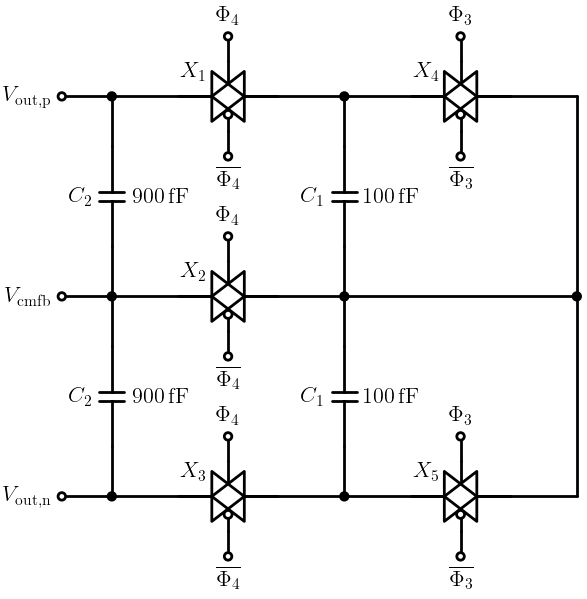

In [3]:
# Draw Switched Capacitor Input Common-Mode Feedback
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
from schemdraw import logic
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)
    
    # Vcmfb
    elm.Dot(open=True).label('$V_\mathrm{cmfb}$', loc='left', ofst=0.15)
    elm.Line().right().length(1).dot()
    mainDot = d.here

    # C2 (upper)
    elm.Line().up().length(1)
    elm.Capacitor().label('$C_2$', loc='top', ofst=0.15).label(r'900\,fF', loc='bottom', ofst=0.15)
    elm.Line().up().length(1).dot()

    # Voutp
    d.push()
    elm.Line().left().length(1)
    elm.Dot(open=True).label('$V_\mathrm{out,p}$', loc='left', ofst=0.15)
    d.pop()

    # X1
    elm.Line().right().length(2)
    X1 = logic.Tgate().label('$X_1$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X1.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_4$', loc='top', ofst=0.15)
    elm.Line().at(X1.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_4}$', loc='bottom', ofst=0.15)
    elm.Line().at(X1.in1).right().length(2).dot()
    d.push()

    # X4
    elm.Line().right().length(2)
    X4 = logic.Tgate().label('$X_4$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X4.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_3$', loc='top', ofst=0.15)
    elm.Line().at(X4.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_3}$', loc='bottom', ofst=0.15)
    elm.Line().at(X4.in1).right().length(2)
    elm.Line().down().toy(mainDot).dot()
    endDot = d.here

    # C1 (upper)
    d.pop()
    elm.Line().down().length(1)
    elm.Capacitor().label('$C_1$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    elm.Line().down().length(1)

    # X2
    elm.Line().at(mainDot).right().length(2)
    X2 = logic.Tgate().label('$X_2$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X2.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_4$', loc='top', ofst=0.15)
    elm.Line().at(X2.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_4}$', loc='bottom', ofst=0.15)
    elm.Line().at(X2.in1).right().length(2).dot()
    elm.Line().right().tox(endDot)

    # C2 (lower)
    elm.Line().at(mainDot).down().length(1)
    elm.Capacitor().label('$C_2$', loc='top', ofst=0.15).label(r'900\,fF', loc='bottom', ofst=0.15)
    elm.Line().down().length(1).dot()

    # Voutn
    d.push()
    elm.Line().left().length(1)
    elm.Dot(open=True).label('$V_\mathrm{out,n}$', loc='left', ofst=0.15)
    d.pop()

    # X3
    elm.Line().right().length(2)
    X3 = logic.Tgate().label('$X_3$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X3.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_4$', loc='top', ofst=0.15)
    elm.Line().at(X3.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_4}$', loc='bottom', ofst=0.15)
    elm.Line().at(X3.in1).right().length(2).dot()
    d.push()

    # X5
    elm.Line().right().length(2)
    X5 = logic.Tgate().label('$X_5$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X5.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_3$', loc='top', ofst=0.15)
    elm.Line().at(X5.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_3}$', loc='bottom', ofst=0.15)
    elm.Line().at(X5.in1).right().length(2)
    elm.Line().up().toy(mainDot)

    # C1 (lower)
    d.pop()
    elm.Line().up().length(1)
    elm.Capacitor().label('$C_1$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    elm.Line().up().length(1)

    # Save the schematic
    d.save('figures/sc_cmfb/input_sc_cmfb_circuit.svg')
    d.save('figures/sc_cmfb/input_sc_cmfb_circuit.pdf')

In [4]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

In [5]:
# Input Common-Mode Feedback Sizing

# Transistor sizing
# ToDo
# W_P = 3.0
# L_P = 0.50

# w_11 = W_P
# l_11 = L_P
# w_12 = W_P
# l_12 = L_P

# Capacitor sizing
C_1 = 100e-15
C_2 = 9 * C_1

# Clock sizing
fclock = 8e6
fphi = fclock / 2**7

In [6]:
# print('Input common-mode feedback W/L ratios:')
# print('------------------------------------')
# print('LV Transmission Gate x1')
# print('LV PMOS M11: W =', w_11, 'um, L =', l_11, 'um')
# print('LV NMOS M12: W =', w_12, 'um, L =', l_12, 'um')
# print('------------------------------------')
# print()

print('Input common-mode feedback capacitor values:')
print('C1 =', C_1 * 1e15, 'fF')
print('C2 =', C_2 * 1e15, 'fF')
print('------------------------------------')
print()

print('Input common-mode feedback clock attributes:')
print('fclock =', fclock * 1e-6, 'MHz')
print('fphi =', fphi * 1e-3, 'kHz')
print('------------------------------------')

Input common-mode feedback capacitor values:
C1 = 100.0 fF
C2 = 900.0 fF
------------------------------------

Input common-mode feedback clock attributes:
fclock = 8.0 MHz
fphi = 62.5 kHz
------------------------------------


# Output Common-Mode Feedback

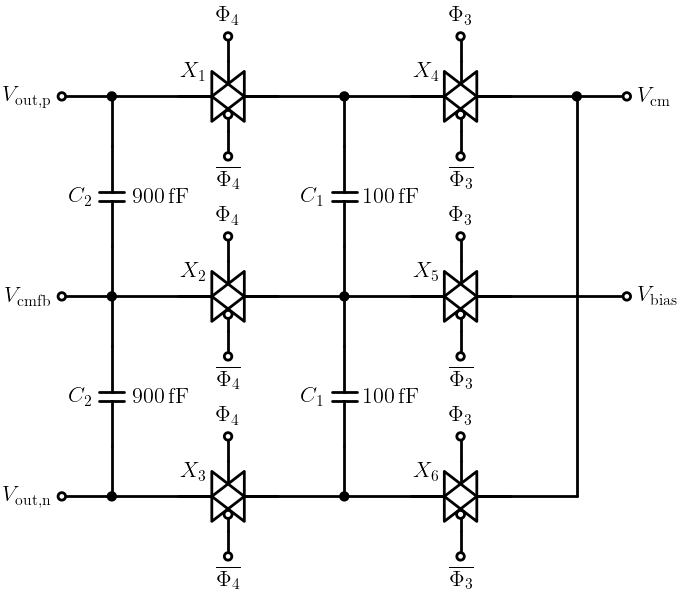

In [7]:
# Draw Switched Capacitor Output Common-Mode Feedback
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
from schemdraw import logic
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)
    
    # Vcmfb
    elm.Dot(open=True).label('$V_\mathrm{cmfb}$', loc='left', ofst=0.15)
    elm.Line().right().length(1).dot()
    mainDot = d.here

    # C2 (upper)
    elm.Line().up().length(1)
    elm.Capacitor().label('$C_2$', loc='top', ofst=0.15).label(r'900\,fF', loc='bottom', ofst=0.15)
    elm.Line().up().length(1).dot()

    # Voutp
    d.push()
    elm.Line().left().length(1)
    elm.Dot(open=True).label('$V_\mathrm{out,p}$', loc='left', ofst=0.15)
    d.pop()

    # X1
    elm.Line().right().length(2)
    X1 = logic.Tgate().label('$X_1$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X1.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_4$', loc='top', ofst=0.15)
    elm.Line().at(X1.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_4}$', loc='bottom', ofst=0.15)
    elm.Line().at(X1.in1).right().length(2).dot()
    d.push()

    # X4
    elm.Line().right().length(2)
    X4 = logic.Tgate().label('$X_4$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X4.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_3$', loc='top', ofst=0.15)
    elm.Line().at(X4.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_3}$', loc='bottom', ofst=0.15)
    elm.Line().at(X4.in1).right().length(2).dot()
    
    # Vcm
    d.push()
    elm.Line().right().length(1)
    elm.Dot(open=True).label('$V_\mathrm{cm}$', loc='right', ofst=0.15)
    d.pop()

    # End Dot
    elm.Line().down().toy(mainDot)
    endDot = d.here

    # C1 (upper)
    d.pop()
    elm.Line().down().length(1)
    elm.Capacitor().label('$C_1$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    elm.Line().down().length(1)

    # X2
    elm.Line().at(mainDot).right().length(2)
    X2 = logic.Tgate().label('$X_2$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X2.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_4$', loc='top', ofst=0.15)
    elm.Line().at(X2.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_4}$', loc='bottom', ofst=0.15)
    elm.Line().at(X2.in1).right().length(2).dot()

    # X5
    elm.Line().right().length(2)
    X5 = logic.Tgate().label('$X_5$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X5.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_3$', loc='top', ofst=0.15)
    elm.Line().at(X5.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_3}$', loc='bottom', ofst=0.15)
    elm.Line().at(X5.in1).right().tox(endDot)

    # Vbias
    elm.Line().right().length(1)
    elm.Dot(open=True).label('$V_\mathrm{bias}$', loc='right', ofst=0.15)


    # C2 (lower)
    elm.Line().at(mainDot).down().length(1)
    elm.Capacitor().label('$C_2$', loc='top', ofst=0.15).label(r'900\,fF', loc='bottom', ofst=0.15)
    elm.Line().down().length(1).dot()

    # Voutn
    d.push()
    elm.Line().left().length(1)
    elm.Dot(open=True).label('$V_\mathrm{out,n}$', loc='left', ofst=0.15)
    d.pop()

    # X3
    elm.Line().right().length(2)
    X3 = logic.Tgate().label('$X_3$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X3.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_4$', loc='top', ofst=0.15)
    elm.Line().at(X3.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_4}$', loc='bottom', ofst=0.15)
    elm.Line().at(X3.in1).right().length(2).dot()
    d.push()

    # X6
    elm.Line().right().length(2)
    X6 = logic.Tgate().label('$X_6$', ofst=(0.7, 0.4)).anchor('out').theta(180)
    elm.Line().at(X6.c).up().length(0.5)
    elm.Dot(open=True).label(r'$\Phi_3$', loc='top', ofst=0.15)
    elm.Line().at(X6.cbar).down().length(0.5)
    elm.Dot(open=True).label(r'$\overline{\Phi_3}$', loc='bottom', ofst=0.15)
    elm.Line().at(X6.in1).right().length(2)
    elm.Line().up().toy(mainDot)

    # C1 (lower)
    d.pop()
    elm.Line().up().length(1)
    elm.Capacitor().label('$C_1$', loc='top', ofst=0.15).label(r'100\,fF', loc='bottom', ofst=0.15)
    elm.Line().up().length(1)

    # Save the schematic
    d.save('figures/sc_cmfb/output_sc_cmfb_circuit.svg')
    d.save('figures/sc_cmfb/output_sc_cmfb_circuit.pdf')

In [8]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

In [9]:
# Transistor sizing
# ToDo
# W_P = 3.0
# L_P = 0.50

# w_11 = W_P
# l_11 = L_P
# w_12 = W_P
# l_12 = L_P

# Capacitor sizing
C_1 = 100e-15
C_2 = 9 * C_1

# Clock sizing
fclock = 8e6
fphi = fclock / 2**7

In [10]:
# print('Output common-mode feedback W/L ratios:')
# print('------------------------------------')
# print('LV Transmission Gate x1')
# print('LV PMOS M11: W =', w_11, 'um, L =', l_11, 'um')
# print('LV NMOS M12: W =', w_12, 'um, L =', l_12, 'um')
# print('------------------------------------')
# print()

print('Output common-mode feedback capacitor values:')
print('C1 =', C_1 * 1e15, 'fF')
print('C2 =', C_2 * 1e15, 'fF')
print('------------------------------------')
print()

print('Input common-mode feedback clock attributes:')
print('fclock =', fclock * 1e-6, 'MHz')
print('fphi =', fphi * 1e-3, 'kHz')
print('------------------------------------')

Output common-mode feedback capacitor values:
C1 = 100.0 fF
C2 = 900.0 fF
------------------------------------

Input common-mode feedback clock attributes:
fclock = 8.0 MHz
fphi = 62.5 kHz
------------------------------------
